# Advanced Data Analysis 2023/24 - assignment 1 solution

**NAME:**

**NUMBER:**

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on information about Olympic games.


The data in the dataset provided was obtained from Kaggle.


### DEADLINE: 29-September-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline.

Students have **three grace days** that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [1]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt


## Datasets

For solving the questions posed, you have the following datasets available.

### Olympic Games Data

Data from the Olympic Games, for the period considered, were collected for each individual athlete in a given Olympic event (or race) and recorded in the file `athlete_events.csv`. For example, the following entry is for the first gold medal won by a Portuguese woman:

| |ID |Name |Sex |Age |Height |Weight |Team |NOC |Games |Year |Season |City |Sport |Event |Medal|
|---|---|-------|-------|-------|-------|-------|- ------|-------|-------|-------|-------|-------|--- ----|-----------|-----|
|164334 |82494 |Rosa Mara Correia dos Santos Mota |F |30 |157 |45 |Portugal |POR |1988 Summer |1988 |Summer |Seoul |Athletics |Athletics Women's Marathon |Gold|

The file structure is illustrated in the figure below:

![Olympic data](imgs/raw_athlete_events.png)

As can be seen, various information is recorded for each individual athlete in a given Olympic event, such as name (`Name`), gender (`Sex`), age (`Age`), edition of the Olympic Games (`Games `), the Olympic event (`Event`) among others. It should be noted that, for each athlete, there is an identifier (`ID`) that is unique to that athlete and invariable - it remains for all Olympic events in which that athlete has participated, regardless of the edition (year).

Regarding Olympic events, there are individual events and team events - e.g. football and the 4x100m relay are team events. In team events, the data includes one record for each athlete on the team.

### Population

CSV file `population.csv` includes information about the population of each country for a given year.

The csv file includes ISO3 code of the country (in lower case) (`geo`), the name of the country (`name`), the year (`time`) and the population (`population`).

### Country codes

CSV file `codes.csv` includes information about the different codes used for different countries.

The csv file includes, among other, the name of the country (`Country`), ISO3 code (`ISO3`) and the national olympic code (`IOC`).


The following code loads the datasets.


In [ ]:
dataFileName = os.path.join( "data", "athlete_events.csv")

dataDF = pd.read_csv(dataFileName)

print(dataDF.head(5))

   ID                      Name Sex   Age  Height  Weight            Team   
0   1                 A Dijiang   M  24.0   180.0    80.0           China  \
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport   
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball  \
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [ ]:
codesFileName = os.path.join( "data", "codes.csv")

codesDF = pd.read_csv(codesFileName)

print(codesDF.head(5))

          Country ISO2 ISO3   ISON  IOC FIPS Plates Domain
0     Afghanistan   AF  AFG    4.0  AFG   AF    AFG    .af
1   Åland Islands   AX  ALA  248.0  NaN  NaN     AX    .ax
2         Albania   AL  ALB    8.0  ALB   AL     AL    .al
3         Algeria   DZ  DZA   12.0  ALG   AG     DZ    .dz
4  American Samoa   AS  ASM   16.0  ASA   AQ    USA    .as


In [ ]:
populationFileName = os.path.join( "data", "population.csv")

populationDF = pd.read_csv(populationFileName)

print(populationDF.head(5))

   geo         name  time  Population
0  afg  Afghanistan  1800   3280000.0
1  afg  Afghanistan  1801   3280000.0
2  afg  Afghanistan  1802   3280000.0
3  afg  Afghanistan  1803   3280000.0
4  afg  Afghanistan  1804   3280000.0


For data on atheletes, there are some information missing. We can compute the number of entries missing using the following code.

**NOTE:** the missing information on Medal is expected - it just means that the athlete has won no medal in the event.

In [ ]:
dataDF.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

**GENERAL NOTE:** In your computations, if there are rows for which needed information is missing, just drop the rows.

## Question 1 (7 points)

In this question, we start by exploring the data available with simple queries. In your answers, you can use the data computed in the previous answers if and when useful.


### **1.a)** How many athletes have participated in Summer Olympics and how many athlete participated in Winter Olympics?



In [ ]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

summer = dataDF[dataDF["Season"]=="Summer"]["ID"].nunique()
print( "summer")
print( summer)
winter = dataDF[dataDF["Season"]=="Winter"]["ID"].nunique()
print( "winter")
print( winter)


summer
116776
winter
18958


### **1.b)** Who are the three youngest and oldest athletes that won a Gold medal in the Olympic games?

Show the following information about each athelete: Name, Age, Team, Games, Sport and Event.


In [ ]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

highest = dataDF[dataDF["Medal"] == "Gold"][["Name","Age","Team","Games","Sport","Event"]].nlargest(3,"Age")
print( "Oldest athletes")
print( highest)
lowest = dataDF[dataDF["Medal"] == "Gold"][["Name","Age","Team","Games","Sport","Event"]].nsmallest(3,"Age")
print( "Youngest athletes")
print( lowest)

# NOTE: this does not show other atheletes if there are more atheletes
# with the same age

Oldest athletes
                        Name   Age           Team        Games   
105199       Charles Jacobus  64.0  United States  1904 Summer  \
233390     Oscar Gomer Swahn  64.0         Sweden  1912 Summer   
104003  Isaac Lazarus Israls  63.0    Netherlands  1928 Summer   

                   Sport                                             Event  
105199             Roque                               Roque Men's Singles  
233390          Shooting  Shooting Men's Running Target, Single Shot, Team  
104003  Art Competitions        Art Competitions Mixed Painting, Paintings  
Youngest athletes
                                     Name   Age           Team        Games   
27207                       Hans Bourquin  13.0    Switzerland  1928 Summer  \
52010  Donna Elizabeth de Varona (-Pinto)  13.0  United States  1960 Summer   
73581                          Fu Mingxia  13.0          China  1992 Summer   

          Sport                                            Event  
27207    

### 1.c) Who are the top-10 athletes that have won more Gold medals in the Olympic Games?



In [ ]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

won = dataDF[(dataDF["Medal"] == "Gold")][["ID","Name","Medal"]].groupby("ID")\
                    .agg({"Name":"first","Medal":"count"})
best = won.nlargest(10,["Medal"])
print(best)



                                      Name  Medal
ID                                               
6430             Shirley Frances Babashoff      6
28790      Aleksandr Nikolayevich Dityatin      6
127501         Mikhail Yakovlevich Voronin      6
4198          Nikolay Yefimovich Andrianov      5
31659      Andrea Ehrig-Schne-Mitscherlich      5
46393                          Dagmar Hase      5
50011       Mariya Kindrativna Horokhovska      5
55692                   Leisel Marie Jones      5
63400                        Katalin Kovcs      5
67046   Larysa Semenivna Latynina (Diriy-)      5


### 1.d) For Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?

Show the following information: Year, Name of athlete, and number of medals.

In [ ]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

won = dataDF[(~dataDF["Medal"].isna())&(dataDF["Year"]>1950)&(dataDF["Season"]=="Summer")][["ID","Name","Medal","Year"]]\
                    .groupby(["ID","Year"]).agg({"Name":"first","Medal":"count"})
byyear = won.reset_index().groupby("Year").apply(lambda p: p.nlargest(1,["Medal"]))
byyear = byyear.set_index("Year").drop(columns=["ID"])
print(byyear)



                                    Name  Medal
Year                                           
1952      Mariya Kindrativna Horokhovska      7
1956           gnes Keleti-Srkny (Klein)      6
1960         Borys Anfiyanovych Shakhlin      7
1964  Larysa Semenivna Latynina (Diriy-)      6
1968         Mikhail Yakovlevich Voronin      7
1972                   Mark Andrew Spitz      7
1976        Nikolay Yefimovich Andrianov      7
1980     Aleksandr Nikolayevich Dityatin      8
1984                             Li Ning      6
1988      Matthew Nicholas "Matt" Biondi      7
1992       Vitaly Venediktovich Shcherbo      6
1996             Aleksey Yuryevich Nemov      6
2000             Aleksey Yuryevich Nemov      6
2004             Michael Fred Phelps, II      8
2008             Michael Fred Phelps, II      8
2012             Michael Fred Phelps, II      6
2016             Michael Fred Phelps, II      6


### 1.e) For each athlete, compute the number of gold, silver and bronze medals she/he has won.

**Suggestions:** two alternative suggestion are investigating pivot tables and custom defined aggregation functions.


In [ ]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

def mymedals( p):
    d = {}
    d["Gold"] = p[p["Medal"]=="Gold"][["Medal"]].count()
    d["Silver"] = p[p["Medal"]=="Silver"][["Medal"]].count()
    d["Bronze"] = p[p["Medal"]=="Bronze"][["Medal"]].count()
    return pd.DataFrame(data=d)

medals = dataDF[["ID","Medal","Name","Year"]].groupby(["ID","Name"]).apply(mymedals)

# Let's print the top 10 just to check
print(medals.nlargest(10,["Gold","Silver","Bronze"]))



                                                              Gold  Silver   
ID     Name                                                                  
94406  Michael Fred Phelps, II                         Medal    23       3  \
33557  Raymond Clarence "Ray" Ewry                     Medal    10       0   
67046  Larysa Semenivna Latynina (Diriy-)              Medal     9       5   
87390  Paavo Johannes Nurmi                            Medal     9       3   
113912 Mark Andrew Spitz                               Medal     9       1   
69210  Frederick Carlton "Carl" Lewis                  Medal     9       1   
11951  Ole Einar Bjrndalen                             Medal     8       4   
35550  Birgit Fischer-Schmidt                          Medal     8       4   
57998  Sawao Kato                                      Medal     8       3   
119922 Jennifer Elisabeth "Jenny" Thompson (-Cumpelik) Medal     8       3   

                                                              B

In [ ]:
medals = dataDF[["ID","Name","Medal","Year"]].groupby(["ID","Name","Medal"]).count().reset_index()
medals = medals.pivot(index=["ID","Name"],columns="Medal",values="Year")
medals = medals.fillna(0)
medals = medals[["Gold","Silver","Bronze"]]
# Let's print the top 10 just to check
print(medals.nlargest(10,["Gold","Silver","Bronze"]))




Medal                                                   Gold  Silver  Bronze
ID     Name                                                                 
94406  Michael Fred Phelps, II                          23.0     3.0     2.0
33557  Raymond Clarence "Ray" Ewry                      10.0     0.0     0.0
67046  Larysa Semenivna Latynina (Diriy-)                9.0     5.0     4.0
87390  Paavo Johannes Nurmi                              9.0     3.0     0.0
113912 Mark Andrew Spitz                                 9.0     1.0     1.0
69210  Frederick Carlton "Carl" Lewis                    9.0     1.0     0.0
11951  Ole Einar Bjrndalen                               8.0     4.0     1.0
35550  Birgit Fischer-Schmidt                            8.0     4.0     0.0
57998  Sawao Kato                                        8.0     3.0     1.0
119922 Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)   8.0     3.0     1.0


### 1.f) For the games of 2016, print the table of medals for each country.

**NOTE:** for collective events (e.g. football, 4*100 meters), you should count only one medal for a given event.
In the cell after the code, explain the rationale of the code to achieve this goal - your solution does not need to be perfect, but only an approximation of the real value.


In [ ]:
# INCORRECT - without filtering duplicates
medals2016a = dataDF[(dataDF["Year"]==2016)&(~dataDF["Medal"].isna())]
medals2016a = medals2016a[["NOC","Medal","ID"]].groupby(["NOC","Medal"]).count().reset_index()
medals2016a = medals2016a.pivot(index="NOC",columns="Medal",values="ID")
medals2016a = medals2016a.fillna(0)
medals2016a = medals2016a[["Gold","Silver","Bronze"]]
print(medals2016a.nlargest(10,["Gold","Silver","Bronze"]))


Medal               Gold  Silver  Bronze
NOC Team                                
USA United States  137.0    52.0    67.0
GBR Great Britain   64.0    55.0    26.0
RUS Russia          50.0    28.0    35.0
GER Germany         47.0    43.0    67.0
CHN China           44.0    30.0    35.0
BRA Brazil          34.0     6.0     6.0
AUS Australia       23.0    34.0    25.0
ARG Argentina       21.0     1.0     0.0
FRA France          20.0    55.0    21.0
JPN Japan           17.0    13.0    34.0


In [ ]:
#Solve question here. Briefly justify your solution in the following markdown cell.

medals2016 = dataDF[(dataDF["Year"]==2016)&(~dataDF["Medal"].isna())]

# Simple solution... filter out all entries for which there are more than two equal medals for an event
# Problem: some sports have 2 bronze medals;
medals2016 = medals2016[["ID","NOC","Medal","Event"]].groupby(["Medal","Event"]).first().reset_index()
medals2016 = medals2016[["NOC","Medal","ID"]].groupby(["NOC","Medal"]).count().reset_index()
medals2016 = medals2016.pivot(index="NOC",columns="Medal",values="ID")
medals2016 = medals2016.fillna(0)
medals2016 = medals2016[["Gold","Silver","Bronze"]]
print(medals2016.nlargest(10,["Gold","Silver","Bronze"]))


Medal              Gold  Silver  Bronze
NOC Team                               
USA United States  45.0    35.0    35.0
GBR Great Britain  27.0    23.0    15.0
CHN China          25.0    18.0    22.0
RUS Russia         18.0    17.0    19.0
GER Germany        16.0    10.0    11.0
JPN Japan          12.0     8.0    19.0
FRA France         10.0    18.0    13.0
KOR South Korea     9.0     3.0     5.0
AUS Australia       8.0    11.0    10.0
ITA Italy           8.0    11.0     8.0


In [ ]:
#Solve question here. Briefly justify your solution in the following markdown cell.

medals2016_2 = dataDF[(dataDF["Year"]==2016)&(~dataDF["Medal"].isna())]

# Better solution... findout event that have more than 5 medals as those that are collective
events2016 = medals2016_2[["Event","ID"]].groupby("Event").count()
events2016["TeamEvent"] = events2016["ID"] > 5
events2016 = events2016[["TeamEvent"]]

medals2016_2 = medals2016_2.join( events2016, on="Event")

medals2016_2c = medals2016_2[medals2016_2["TeamEvent"]].groupby(["Medal","Event"]).first().reset_index()
medals2016_2 = pd.concat([medals2016_2c,medals2016_2[~medals2016_2["TeamEvent"]]])


medals2016_2 = medals2016_2[["NOC","Medal","ID"]].groupby(["NOC","Medal"]).count().reset_index()
medals2016_2 = medals2016_2.pivot(index="NOC",columns="Medal",values="ID")
medals2016_2 = medals2016_2.fillna(0)
medals2016_2 = medals2016_2[["Gold","Silver","Bronze"]]
print(medals2016.nlargest(10,["Gold","Silver","Bronze"]))


Medal              Gold  Silver  Bronze
NOC Team                               
USA United States  45.0    35.0    35.0
GBR Great Britain  27.0    23.0    15.0
CHN China          25.0    18.0    22.0
RUS Russia         18.0    17.0    19.0
GER Germany        16.0    10.0    11.0
JPN Japan          12.0     8.0    19.0
FRA France         10.0    18.0    13.0
KOR South Korea     9.0     3.0     5.0
AUS Australia       8.0    11.0    10.0
ITA Italy           8.0    11.0     8.0


**Rationale:** to be completed

## Question 2 (2 points)

It is normal that smaller countries conquer less medals, as their population is smaller.
In this question, we try to put the number of medals into prespective, considering the population of countries.




### 2.a) For the games of 2016, print the table of medals for each country per million inhabitants.



In [ ]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#NOTE: using inner has there is no benefit of keeping incomplete lines
populationDF["geo"]=populationDF["geo"].str.upper()
population2016DF = populationDF[populationDF["time"]==2016]
medalsPerMillion = medals2016_2.join(codesDF.set_index("IOC"),how="inner").set_index("ISO3")\
                            .join(population2016DF.set_index("geo"),how="inner")
medalsPerMillion["Gold1M"] = medalsPerMillion["Gold"] / (medalsPerMillion["Population"] / 1000000)
medalsPerMillion["Silver1M"] = medalsPerMillion["Silver"] / (medalsPerMillion["Population"] / 1000000)
medalsPerMillion["Bronze1M"] = medalsPerMillion["Bronze"] / (medalsPerMillion["Population"] / 1000000)
medalsPerMillion = medalsPerMillion[["name","Gold1M","Silver1M","Bronze1M"]]
print(medalsPerMillion.nlargest(10,["Gold1M","Silver1M","Bronze1M"]))


            name    Gold1M  Silver1M  Bronze1M
BHS      Bahamas  2.525406  0.000000  2.525406
JAM      Jamaica  2.140797  1.070398  0.713599
HRV      Croatia  1.183782  0.710269  0.473513
FJI         Fiji  1.088885  0.000000  0.000000
NZL  New Zealand  0.856883  1.927987  1.071104
HUN      Hungary  0.815070  0.305651  0.407535
BHR      Bahrain  0.709390  0.709390  0.000000
GEO      Georgia  0.530348  0.265174  1.060696
SVN     Slovenia  0.478464  0.956929  0.478464
NLD  Netherlands  0.467167  0.408771  0.233583


## Question 3 (4 points)

This third question focus on processing the information on a time series for plotting it.


In [ ]:
# will create a dataframe with medals per country in each edition
# excluding duplicates

# students are not graded by the quality of solution here, but
# they should not use base data directly


medalsAll = dataDF[(~dataDF["Medal"].isna())]

# Better solution... findout event that have more than 5 medals as those that are collective
events = medalsAll[["Event","Year","ID"]].groupby(["Event","Year"]).count()
events["TeamEvent"] = events["ID"] > 5
events = events[["TeamEvent"]]

medalsAll = medalsAll.join( events, on=["Event","Year"])

medalsNoDup = medalsAll[medalsAll["TeamEvent"]].groupby(["Medal","Event"]).first().reset_index()
medalsNoDup = pd.concat([medalsNoDup,medalsAll[~medalsAll["TeamEvent"]]])



         Medal                                          Event      ID   
0       Bronze  Archery Men's Target Archery, 28 metres, Team   15721  \
1       Bronze                             Archery Men's Team   11799   
2       Bronze                       Archery Men's Team Round   15893   
3       Bronze                           Archery Women's Team    5233   
4       Bronze      Athletics Men's 1,600 metres Medley Relay   12639   
...        ...                                            ...     ...   
271010  Silver                Weightlifting Men's Lightweight  135521   
271032  Bronze                      Judo Women's Middleweight  135535   
271076    Gold                     Athletics Women's Shot Put  135553   
271078  Silver                     Athletics Women's Shot Put  135553   
271080  Bronze                     Athletics Women's Shot Put  135553   

                                       Name Sex   Age  Height  Weight   
0                         Julien Louis Brul   M  4

### 3.a) Display the information about the number of athletes and medals wons by a country in the Olympic games over the years.

Select a country that has a significative number of medals and plot the results.
Discuss the rationale of your solution, including why you have decided to show the lines you are presenting and any processing you have done to the lines.


<AxesSubplot: title={'center': 'Winter games'}, xlabel='Year'>

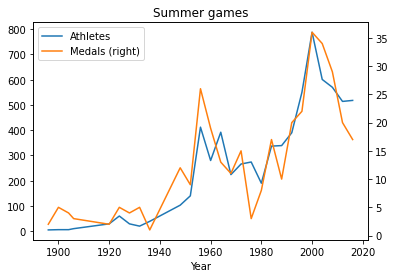

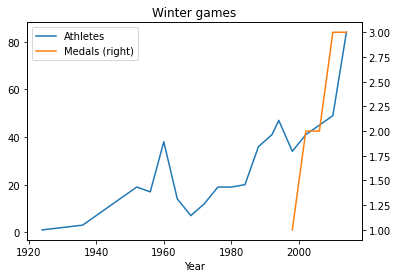

In [ ]:
#Solve question here. Briefly justify your solution in the following markdown cell.

country = "AUS"


result = dataDF[dataDF["NOC"]==country][["Year","Season","ID"]]\
                    .groupby(["Season","Year"]).count()\
                    .rename(columns={"ID": "Athletes"})
result = result.join( medalsNoDup[medalsNoDup["NOC"]==country][["Year","Season","ID"]]\
                    .groupby(["Season","Year"]).count()\
                    .rename(columns={"ID": "Medals"}))
result = result.reset_index()
result[result["Season"]=="Summer"].plot(x="Year",y=["Athletes","Medals"],secondary_y="Medals",title="Summer games")
result[result["Season"]=="Winter"].plot(x="Year",y=["Athletes","Medals"],secondary_y="Medals",title="Winter games")


**Rationale:** to be completed

### 3.b) Display trends of athletes and medals for a given country.

There might be some editions that are an outlier in the number of athletes or medals a given country wins. Instead of plotting the actual values, plot trend lines.



<AxesSubplot: title={'center': 'Winter games'}, xlabel='Year'>

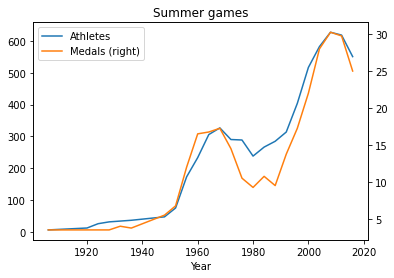

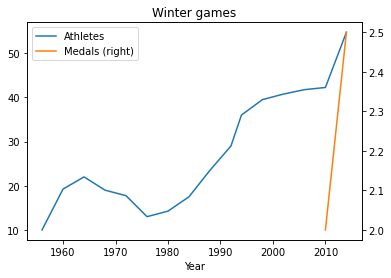

In [ ]:
#Solve question here. Briefly justy you solution in the following markdown cell.

summerMA = result[result["Season"]=="Summer"][["Year","Athletes","Medals"]].set_index("Year").rolling(4).mean()
summerMA.plot(y=["Athletes","Medals"],secondary_y="Medals",title="Summer games")


winterMA = result[result["Season"]=="Winter"][["Year","Athletes","Medals"]].set_index("Year").rolling(4).mean()
winterMA.plot(y=["Athletes","Medals"],secondary_y="Medals",title="Winter games")



**Rationale:** to be completed

## Question 4 (5 points)

This third question focus on understanding the relations between elements.


### 4.a) Is there any relation between the medals won by different countries?

Study the relation in the evolution of medals won by different countries over the years.

Select four countries with a significative number of medals.

Note: Some useful
* Drop columns - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
* Rename columns - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)


In [ ]:
#Solve question here. Briefly justify your solution in the following markdown cell.

countriesMedals = medalsNoDup[(medalsNoDup["Season"]=="Summer")&(medalsNoDup["NOC"].isin(["USA","CHN","GBR","FRA"]))]\
                [["NOC","Medal","Year"]]\
                .groupby(["NOC","Year"]).count().reset_index()

countriesMedals = countriesMedals.pivot(index="Year",columns="NOC",values="Medal")
countriesMedals = countriesMedals.fillna(0)

print(countriesMedals.corr())


NOC       CHN       FRA       GBR       USA
NOC                                        
CHN  1.000000  0.264795  0.216095  0.200244
FRA  0.264795  1.000000  0.205328 -0.146123
GBR  0.216095  0.205328  1.000000 -0.105180
USA  0.200244 -0.146123 -0.105180  1.000000


In [ ]:
#Solve question here. Briefly justify your solution in the following markdown cell.

countriesGold = medalsNoDup[(medalsNoDup["Season"]=="Summer")&(medalsNoDup["Medal"]=="Gold")&\
                            (medalsNoDup["NOC"].isin(["USA","CHN","GBR","FRA"]))]\
                [["NOC","Medal","Year"]]\
                .groupby(["NOC","Year"]).count().reset_index()

countriesGold = countriesGold.pivot(index="Year",columns="NOC",values="Medal")
countriesGold = countriesGold.fillna(0)

print(countriesGold.corr())


NOC       CHN       FRA       GBR       USA
NOC                                        
CHN  1.000000  0.099755  0.247132  0.110191
FRA  0.099755  1.000000  0.121020 -0.206567
GBR  0.247132  0.121020  1.000000 -0.080755
USA  0.110191 -0.206567 -0.080755  1.000000


**Present an interpretation of the results here:** to be completed

### 4.b) Extended analysis

As medals are competitive, one could expect that the fact that some countries starts winning more medals leads other countries to win less medals. But this would only be true if the total number of medals would have remained constant.

Suggest an alternative analysis and implement it.



**Analysis proposed:**


**Rationale of implementation:**

In [ ]:
#Solve question here. Briefly justify your solution in the following markdown cell.

# Instead of using global values, let's use fraction of medals

countriesMedalsPct = medalsNoDup[(medalsNoDup["Season"]=="Summer")&(medalsNoDup["NOC"].isin(["USA","CHN","GBR","FRA"]))]\
                [["NOC","Medal","Year"]]\
                .groupby(["NOC","Year"]).count().reset_index()


countriesMedalsPct = countriesMedalsPct.pivot(index="Year",columns="NOC",values="Medal")
countriesMedalsPct = countriesMedalsPct.fillna(0)
countriesMedalsPct = countriesMedalsPct.join( medalsNoDup[medalsNoDup["Season"]=="Summer"][["Year","ID"]]\
                                             .groupby("Year").count().rename(columns={"ID":"Total"}))
countriesMedalsPct["CHNpct"]=countriesMedalsPct["CHN"]/countriesMedalsPct["Total"]
countriesMedalsPct["FRApct"]=countriesMedalsPct["FRA"]/countriesMedalsPct["Total"]
countriesMedalsPct["GBRpct"]=countriesMedalsPct["GBR"]/countriesMedalsPct["Total"]
countriesMedalsPct["USApct"]=countriesMedalsPct["USA"]/countriesMedalsPct["Total"]
countriesMedalsPct=countriesMedalsPct[["CHNpct","FRApct","GBRpct","USApct"]]

print(countriesMedalsPct.corr())



          CHNpct    FRApct    GBRpct    USApct
CHNpct  1.000000 -0.173537 -0.159590 -0.295325
FRApct -0.173537  1.000000  0.255351 -0.049323
GBRpct -0.159590  0.255351  1.000000 -0.063238
USApct -0.295325 -0.049323 -0.063238  1.000000


**Rationale and comments:**

## Question 5 (2 points)

This group focus on implementation using Spark SQL.

In [2]:
!apt-get install openjdk-17-jdk-headless
!pip install pyspark
!pip install gdown
!gdown 'https://drive.google.com/uc?id=1FXFeLvuT5tN0S-7ay5T7sFAMv9BjwO_H'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  openjdk-17-jre-headless
Suggested packages:
  openjdk-17-demo openjdk-17-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-17-jdk-headless openjdk-17-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 18 not upgraded.
Need to get 119 MB of archives.
After this operation, 271 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-17-jre-headless amd64 17.0.8.1+1~us1-0ubuntu1~22.04 [48.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-17-jdk-headless amd64 17.0.8.1+1~us1-0ubuntu1~22.04 [71.1 MB]
Fetched 119 MB in 11s (11.2 MB/s)
Selecting previously unselected package openjdk-17-jre-headless:amd64.


In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

spark = SparkSession.builder \
.master("local") \
.appName("Simple test") \
.config("spark.sql.execution.arrow.pyspark.enabled", "true") \
.getOrCreate()

atFilename = "athlete_events.csv"

# Read a CSV file into a DataFrame
df = spark.read.option("header", True).option("inferSchema",True).csv(atFilename)
df.createOrReplaceTempView("data")


+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+
| ID|                Name|Sex|Age|Height|Weight|          Team|NOC|      Games|Year|Season|       City|               Sport|               Event|Medal|
+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+
|  1|           A Dijiang|  M| 24|   180|    80|         China|CHN|1992 Summer|1992|Summer|  Barcelona|          Basketball|Basketball Men's ...|   NA|
|  2|            A Lamusi|  M| 23|   170|    60|         China|CHN|2012 Summer|2012|Summer|     London|                Judo|Judo Men's Extra-...|   NA|
|  3| Gunnar Nielsen Aaby|  M| 24|    NA|    NA|       Denmark|DEN|1920 Summer|1920|Summer|  Antwerpen|            Football|Football Men's Fo...|   NA|
|  4|Edgar Lindenau Aabye|  M| 34|    NA|    NA|Denmark/Sweden|DEN|1900 Summer|1900|Summ

### 5.a) Reimplement question 1.e in Spark SQL.


In [22]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.


spark.sql("""SELECT FIRST(Name) Name, COUNT(*) as Medals FROM data
                  WHERE Medal <> "NA"
                  GROUP BY ID
                  ORDER BY Medals DESC
                  LIMIT 10
          """).show()

+--------------------+------+
|                Name|Medals|
+--------------------+------+
|Michael Fred Phel...|    28|
|Larysa Semenivna ...|    18|
|"William Henry ""...|    16|
|Nikolay Yefimovic...|    15|
| Ole Einar Bjrndalen|    13|
| Edoardo Mangiarotti|    13|
|         Takashi Ono|    13|
|Borys Anfiyanovyc...|    13|
|Birgit Fischer-Sc...|    12|
|          Sawao Kato|    12|
+--------------------+------+



In [21]:
spark.sql("""SELECT n.name, CASE WHEN ISNULL(Gold) THEN 0 ELSE Gold END Gold,
                        CASE WHEN ISNULL(Silver) THEN 0 ELSE Silver END Silver,
                        CASE WHEN ISNULL(Bronze) THEN 0 ELSE Bronze END Bronze FROM
                  (SELECT id,COUNT(*) Gold FROM data WHERE Medal = "Gold" GROUP BY id) g FULL OUTER JOIN
                  (SELECT id,COUNT(*) Silver FROM data WHERE Medal = "Silver" GROUP BY id) s ON g.id = s.id FULL OUTER JOIN
                  (SELECT id,COUNT(*) Bronze FROM data WHERE Medal = "Bronze" GROUP BY id) b ON g.id = b.id LEFT JOIN
                  (SELECT id, FIRST(name) name FROM data GROUP BY id) n ON g.id = n.id
                  ORDER BY Gold DESC, Silver DESC, Bronze DESC
                  LIMIT 10
          """).show()

+--------------------+----+------+------+
|                name|Gold|Silver|Bronze|
+--------------------+----+------+------+
|Michael Fred Phel...|  23|     3|     2|
|"Raymond Clarence...|  10|     0|     0|
|Larysa Semenivna ...|   9|     5|     4|
|Paavo Johannes Nurmi|   9|     3|     0|
|   Mark Andrew Spitz|   9|     1|     1|
|"Frederick Carlto...|   9|     1|     0|
| Ole Einar Bjrndalen|   8|     4|     1|
|Birgit Fischer-Sc...|   8|     4|     0|
|          Sawao Kato|   8|     3|     1|
|"Jennifer Elisabe...|   8|     3|     1|
+--------------------+----+------+------+



### 5.a) Reimplement question 1.d in Spark SQL.


In [36]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
#for Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?

spark.sql("""SELECT Year, Name, Medals FROM
              (SELECT Year, Name, Medals, RANK(Medals) OVER
                        (PARTITION BY year ORDER BY Medals DESC) rank FROM
                  (SELECT id, year, FIRST(Name) name, count(*) Medals FROM data
                          WHERE year > 1950 AND Season = "Summer" AND Medal <> "NA" GROUP BY id, year)
              )
              WHERE rank = 1
              ORDER BY Year
          """).show(100)

+----+--------------------+------+
|Year|                Name|Medals|
+----+--------------------+------+
|1952|Mariya Kindrativn...|     7|
|1956|gnes Keleti-Srkny...|     6|
|1956|Larysa Semenivna ...|     6|
|1960|Borys Anfiyanovyc...|     7|
|1964|Larysa Semenivna ...|     6|
|1968|Mikhail Yakovlevi...|     7|
|1972|   Mark Andrew Spitz|     7|
|1976|Nikolay Yefimovic...|     7|
|1980|Aleksandr Nikolay...|     8|
|1984|             Li Ning|     6|
|1988|"Matthew Nicholas...|     7|
|1992|Vitaly Venediktov...|     6|
|1996|Aleksey Yuryevich...|     6|
|2000|Aleksey Yuryevich...|     6|
|2004|Michael Fred Phel...|     8|
|2008|Michael Fred Phel...|     8|
|2012|Michael Fred Phel...|     6|
|2016|Michael Fred Phel...|     6|
+----+--------------------+------+

